In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data_dir = '../../results/data/experiment1'
df = None
# Load data
for file in os.listdir(data_dir):
    if not file.endswith('.csv'):
        continue
    if df is None:
        df = pd.read_csv(f'{data_dir}/{file}')
    else:
        df = pd.concat([df, pd.read_csv(f'{data_dir}/{file}')])
    
# df = pd.read_csv(f'{data_dir}/709551_set1_entropy_bb-True_default.csv')

In [7]:
df

,iteration,region,score_type,score,subject_id,labelset,uncertainty_measure,background_bias,guidance,feature,bb_flipped_fg_frac
0,0,Other,precision,0.950267,677968,set1,entropy,False,log,default,0.000000
1,0,Other,recall,0.458912,677968,set1,entropy,False,log,default,0.000000
2,0,Other,f1,0.618929,677968,set1,entropy,False,log,default,0.000000
3,0,CG,precision,0.267266,677968,set1,entropy,False,log,default,0.000000
4,0,CG,recall,0.694907,677968,set1,entropy,False,log,default,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
259,10,SLF,right_recall,0.754202,782561,set2,entropy,True,log,default,0.242014
260,10,SLF,right_f1,0.590693,782561,set2,entropy,True,log,default,0.242014
261,10,Avg,prec,0.463662,782561,set2,entropy,True,log,default,0.242014
262,10,Avg,recall,0.818876,782561,set2,entropy,True,log,default,0.242014


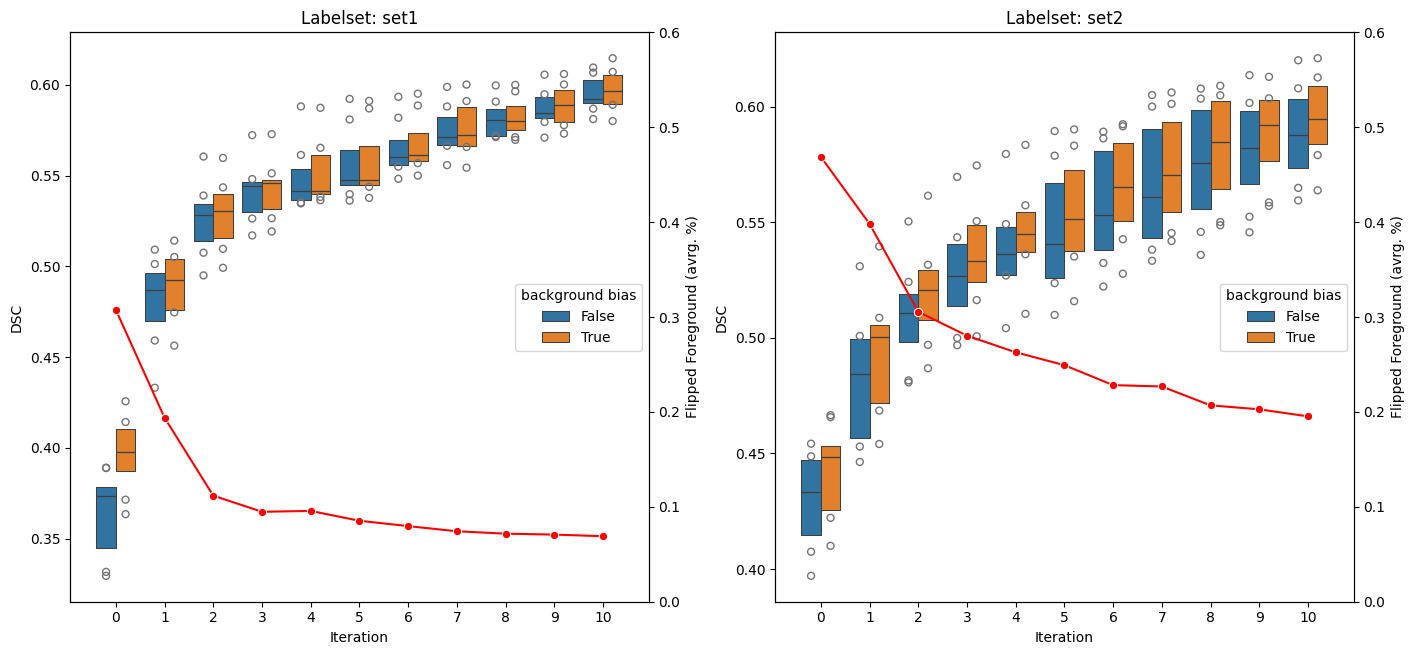

In [12]:
filtered_df = df[(df['region'] == 'Avg') & (df['score_type'] == 'f1')]

# Get unique labelsets
labelsets = filtered_df['labelset'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(15, 7), sharey=False)

for ax, labelset in zip(axes, labelsets):
    subset = filtered_df[filtered_df['labelset'] == labelset]
    
    # Create boxplot
    sns.boxenplot(
        data=subset,
        x='iteration',
        y='score',
        hue='background_bias',
        ax=ax,
        # errorbar='ci'
    )
    ax.set_title(f'Labelset: {labelset}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('DSC')
    ax.legend(title='background bias', loc='center right')
    
    # Create secondary y-axis
    ax2 = ax.twinx()
    
    # Calculate mean bb_flipped_fg_frac for each iteration
    bb_subset = subset[subset['background_bias'] == True]
    mean_frac = bb_subset.groupby('iteration')['bb_flipped_fg_frac'].mean().reset_index()
    
    # Plot lineplot on secondary y-axis
    sns.lineplot(
        data=mean_frac,
        x='iteration',
        y='bb_flipped_fg_frac',
        ax=ax2,
        color='red',
        marker='o'
    )
    ax2.set_ylabel('Flipped Foreground (avrg. %)')
    ax2.set_ylim(0, 0.6)
    ax2.grid(False)

# Set common x-axis label
# fig.text(0.5, 0.04, 'Iteration', ha='center')

# Add a legend
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right', title='Background Bias')

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# fig.savefig(f'{data_dir}/experiment1_f1.png')

In [19]:
filtered_df[(filtered_df['subject_id'] == 782561) & (filtered_df['iteration'] == 2)]

,iteration,region,score_type,score,subject_id,labelset,uncertainty_measure,background_bias,guidance,feature,bb_flipped_fg_frac
53,2,Avg,f1,0.531104,782561,set1,entropy,False,log,default,0.000000
53,2,Avg,f1,0.531441,782561,set1,entropy,True,log,default,0.096322
71,2,Avg,f1,0.511856,782561,set2,entropy,False,log,default,0.000000
71,2,Avg,f1,0.520321,782561,set2,entropy,True,log,default,0.390691
